<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/Imbalanced_Dataset_Evaluation_Metrics_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handle Imbalanced dataset and Evaluation metrics of classifier

## 1. DataSet Introduction



### Dataset
Credit card fraud Detection: Credit card fraud is a wide-ranging term for theft and fraud committed using or involving a payment card, such as a credit card or debit card, as a fraudulent source of funds in a transaction.

The dataset has 1010 rows and 31 columns, including:

*   V1-V28: Anonymized numerical features
*   Amount: Transaction amount
*   Class: Target variable (0 = normal, 1 = fraud)

The dataset is highly imbalanced:


*   1002 normal transactions (Class 0)
*   8 fraudulent transactions (Class 1)










## Handle Imbalanced dataset

1.   Resampling Techniques
2.   Use Class Weights in ML Models

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("creditcard-test.csv")

### 1. Check class distribution

In [ ]:
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]
print(f"Number of Fraud (minority): {df_minority.shape[0]}")
print(f"Number of Non-Fraud (majority): {df_majority.shape[0]}")

Number of Fraud (minority): 8
Number of Non-Fraud (majority): 1002


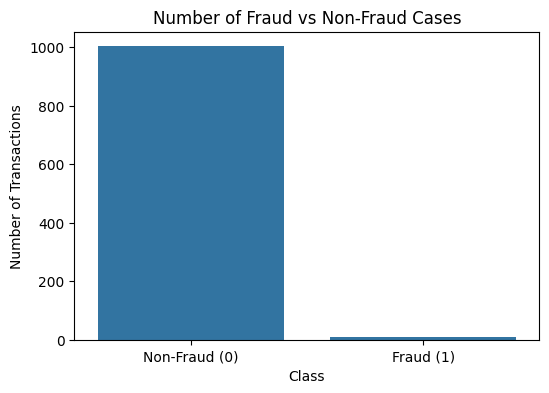

In [ ]:
# Original class distribution
class_counts = df['Class'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.title('Number of Fraud vs Non-Fraud Cases')
plt.show()


### 2.Resampling Techniques


*   Oversampling the Minority Class
*   Undersampling the Majority Class
*   Adjust Decision Threshold



In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

# Oversample minority class
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=1002,  # Match majority class
                                   random_state=42)

# Combine majority class with oversampled minority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Check new class distribution
print(df_balanced['Class'].value_counts())


Class
0    1002
1    1002
Name: count, dtype: int64


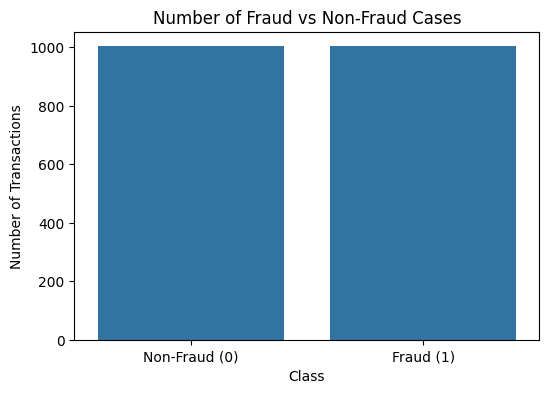

In [ ]:
# Original class distribution
class_counts = df_balanced['Class'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.title('Number of Fraud vs Non-Fraud Cases')
plt.show()

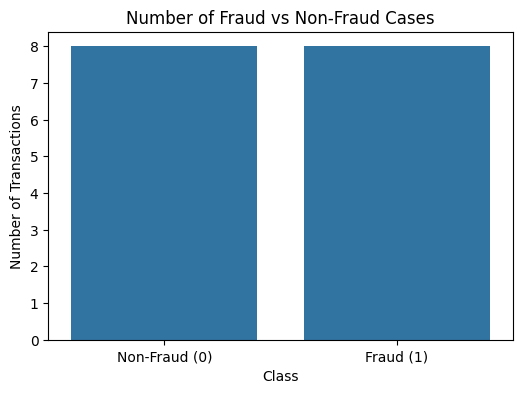

In [ ]:
# Undersample majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,   # Sample without replacement
                                    n_samples=len(df_minority),  # Match minority class count
                                    random_state=42)

# Combine undersampled majority class with minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Original class distribution
class_counts = df_undersampled['Class'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.title('Number of Fraud vs Non-Fraud Cases')
plt.show()

### 3.Use Class Weights in ML Models

ML Models provide class weight attritube to handle imbalance dataset. The below are examples for:


*   Logistic Regression ML model
*   Random Forest ML model



3.1 Logistic Regression with Class Weight

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define features and target variable
X = df.drop(columns=['Class'])  # Features (all except 'Class')
y = df['Class']  # Target variable (0 = Non-Fraud, 1 = Fraud)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression with class_weight='balanced'
logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       200
           1       0.50      0.50      0.50         2

    accuracy                           0.99       202
   macro avg       0.75      0.75      0.75       202
weighted avg       0.99      0.99      0.99       202



3.2 Random Forest with Class Weight

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest with class_weight='balanced'
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      0.50      0.67         2

    accuracy                           1.00       202
   macro avg       1.00      0.75      0.83       202
weighted avg       1.00      1.00      0.99       202



### 4. Adjust Decision Threshold
Adjusting the decision threshold can help improve fraud detection by balancing precision and recall. By default, a classifier predicts 1 (fraud) if the probability is ≥ 0.5. However, in imbalanced datasets, lowering the threshold can help catch more fraud cases.

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Train Logistic Regression with class_weight='balanced'
logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predict probabilities
y_scores = logreg_model.predict_proba(X_test)[:, 1]  # Get fraud probabilities

# Find the best threshold using Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall)  # Compute F1 scores
optimal_threshold = thresholds[np.argmax(f1_scores)]  # Best threshold

print(f"Optimal Decision Threshold: {optimal_threshold:.2f}")

# Apply the new threshold
y_pred_adjusted = (y_scores >= optimal_threshold).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_adjusted))

Optimal Decision Threshold: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      0.50      0.67         2

    accuracy                           1.00       202
   macro avg       1.00      0.75      0.83       202
weighted avg       1.00      1.00      0.99       202



### 5. Use Anomaly Detection (for Extremely Imbalanced Data)

Anomaly detection is useful for fraud detection in highly imbalanced datasets. Instead of classifying transactions directly, it treats fraud cases as outliers.

The Isolation Forest and One-Class SVM are common anomaly detection techniques. Below, I'll use Isolation Forest to detect fraud in the creditcard-danh.csv dataset.

In [ ]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.001, random_state=42)  # Adjust contamination level based on fraud ratio
iso_forest.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
y_pred_iso = iso_forest.predict(X)

# Convert Isolation Forest predictions to match the dataset (anomalies = fraud)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# Print classification report
print(classification_report(y, y_pred_iso))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1002
           1       0.50      0.12      0.20         8

    accuracy                           0.99      1010
   macro avg       0.75      0.56      0.60      1010
weighted avg       0.99      0.99      0.99      1010



## Evaluation metrics of classifier
Each metric has its own use case. For example:

*   Accuracy for balanced datasets. (Measures the proportion of correctly classified instances out of the total instances)
*   F1-score for imbalanced datasets. (Balances precision and recall.)
*   ROC-AUC for ranking classifiers. (trade-off between sensitivity and specificity)
*   Log Loss for probabilistic predictions. (Used in probabilistic classifiers like logistic regression.)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score,
    balanced_accuracy_score
)

# Separate features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)
# Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute all evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
logloss = log_loss(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
# Compute specificity (true negative rate)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
g_mean = np.sqrt(recall * specificity)

# Store results
evaluation_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc,
    "Log Loss": logloss,
    "Matthews Corr. Coeff (MCC)": mcc,
    "Cohen’s Kappa": cohen_kappa,
    "Balanced Accuracy": balanced_acc,
    "Specificity": specificity,
    "G-Mean": g_mean
}

for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")


Accuracy: 0.9950
Precision: 1.0000
Recall: 0.5000
F1-Score: 0.6667
ROC-AUC: 0.7387
Log Loss: 0.1797
Matthews Corr. Coeff (MCC): 0.7053
Cohen’s Kappa: 0.6645
Balanced Accuracy: 0.7500
Specificity: 1.0000
G-Mean: 0.7071
